In [123]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Generer data (Skip denne del)

Dette er blot til at generere dataet til opgave 1

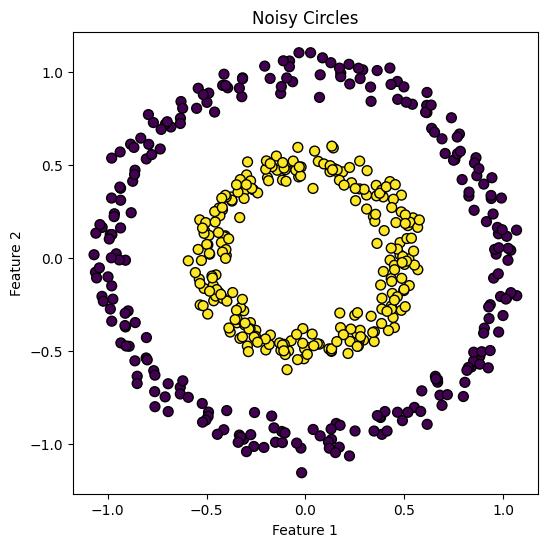

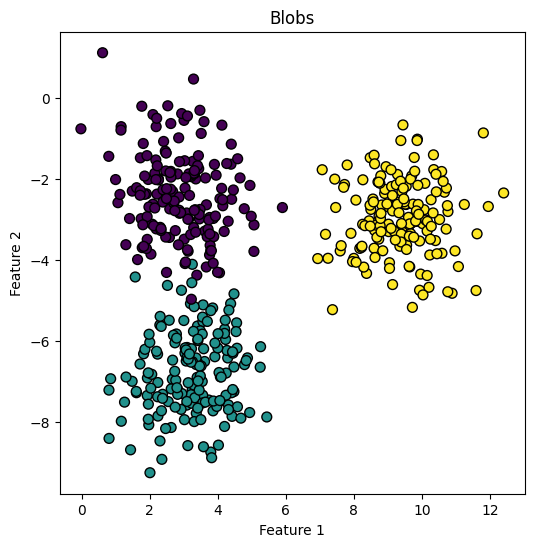

In [124]:
from sklearn import cluster, datasets, mixture
# Generering af syntetiske data
n_samples = 500
seed = 30
noisy_circles, labels_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)

blobs, labels_blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)

# Plot funktion
def plot_dataset(X, y, title):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot alle tre datasæt
plot_dataset(noisy_circles, labels_circles, "Noisy Circles")
plot_dataset(blobs, labels_blobs, "Blobs")

# save dataset as csv for later use

df = pd.DataFrame(blobs, columns=["Feature1", "Feature2"])
df["labels"] = labels_blobs
df.to_csv("blobs.csv", index=False)

df = pd.DataFrame(noisy_circles, columns=["Feature1", "Feature2"])
df["labels"] = labels_circles
df.to_csv("noisy_circles.csv", index=False)


# Opgave 1

Load, plot og scale

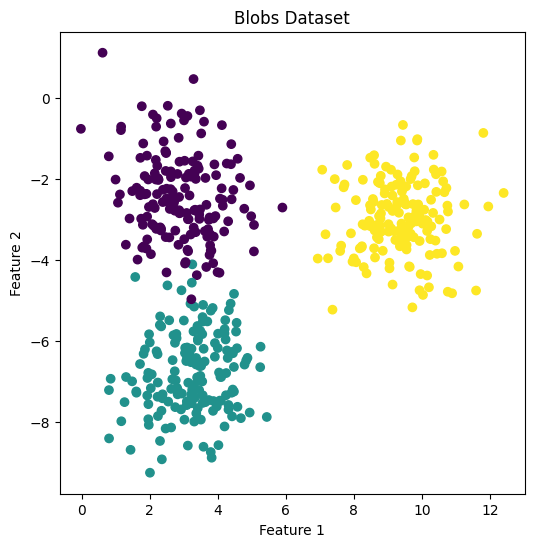

In [125]:
# Load blobs datasæt
blobs_data = pd.read_csv('blobs.csv')
X = blobs_data[blobs_data.columns[:-1]].values  # Labels er sidste kolonne - Læs værdier indtil sidste kolonne
labels_blobs = blobs_data[blobs_data.columns[-1]].values

# plot data
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=labels_blobs, cmap='viridis')
plt.title("Blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Scale features
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(X)

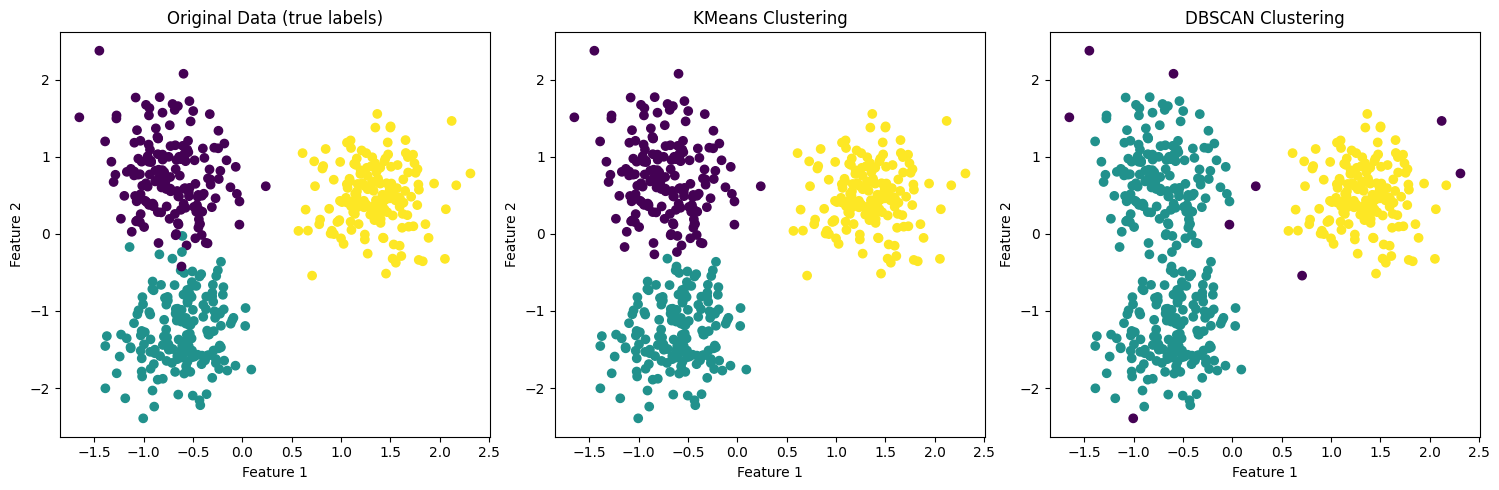

In [126]:
# KMeans
k = 3 # Antal clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Make a subplot of the ground truth, KMeans results and DBSCAN results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_blobs, cmap='viridis')
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Original Data (true labels)")
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("KMeans Clustering")
axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].set_title("DBSCAN Clustering")

plt.tight_layout()
plt.show()

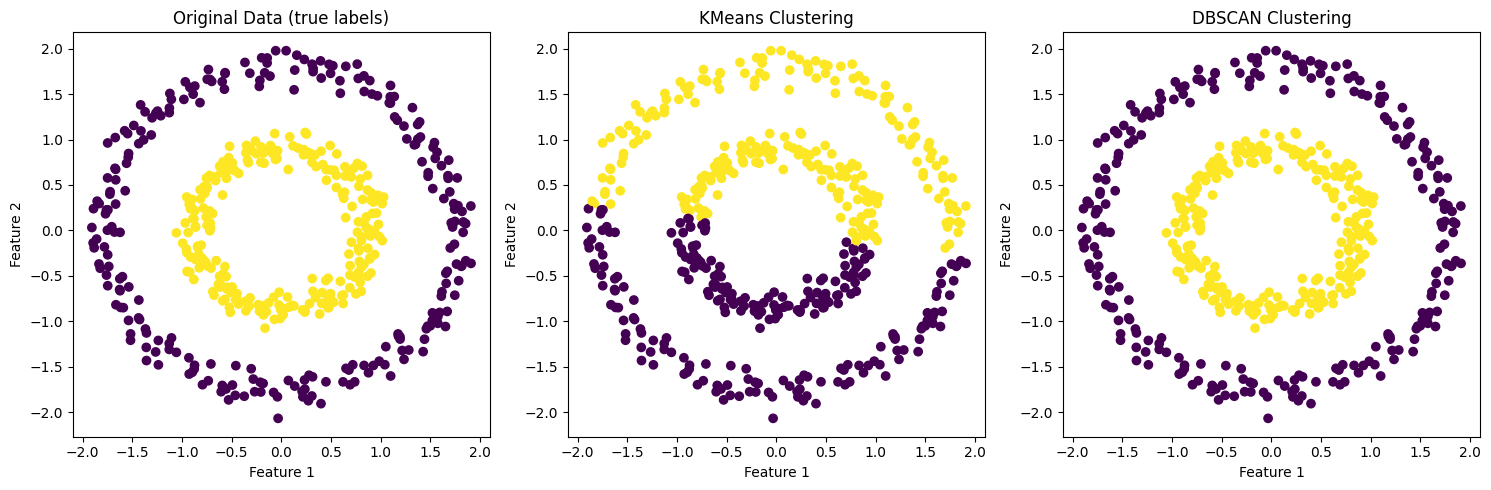

In [127]:
# Load noisy circles dataset
circles_data = pd.read_csv('noisy_circles.csv')
X = circles_data[['Feature1', 'Feature2']].values
labels_circles = circles_data['labels'].values


# Scale features
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(X)

# KMeans
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Make a subplot of the ground truth, KMeans results and DBSCAN results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_circles, cmap='viridis')
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")
axes[0].set_title("Original Data (true labels)")
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("KMeans Clustering")
axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
axes[2].set_xlabel("Feature 1")
axes[2].set_ylabel("Feature 2")
axes[2].set_title("DBSCAN Clustering")


plt.tight_layout()
plt.show()

# Opgave 2

Load og udforsk

In [128]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

df.head()
df.shape
df.isna().sum()
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Udforsk data

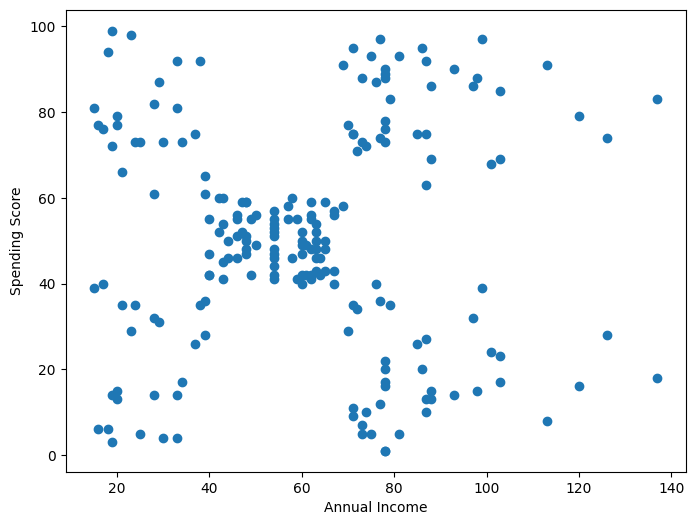

In [129]:
# Select features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.show()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Når man arbejder med clustering, har man ofte mange features (variable).
Det gør det svært at vurdere grupperinger visuelt, fordi man ikke kan se alle dimensioner på én gang.

Derfor bruger man i stedet metrikker til at vurdere, hvor mange clusters (k) der passer bedst til data.
(Hint: Slide 14)

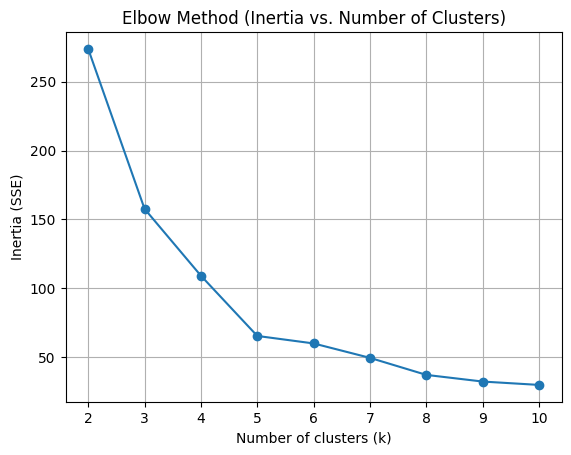

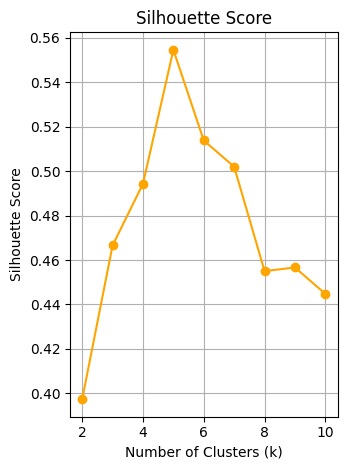

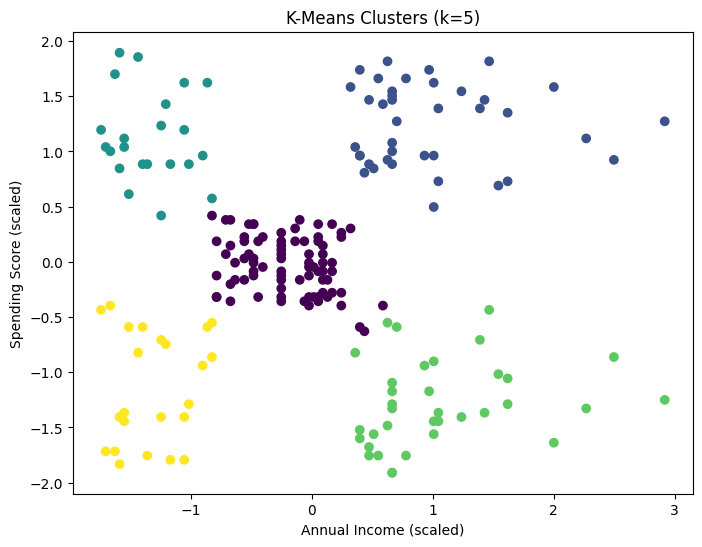

In [130]:
# Inertia
k_values = range(2, 11) # Starter fra 2 (inklusiv) til 11 (eksklusiv) - Så vi får en list med k fra 2 til 10

inertias = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method (Inertia vs. Number of Clusters)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()


# Silhouette Scores
sil_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)


# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_values, sil_scores, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Choose best k
best_k = k_values[sil_scores.index(max(sil_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot K-Means clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=kmeans_labels, cmap='viridis')
plt.title(f"K-Means Clusters (k={best_k})")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

# Opgave 3

(200,)
(200, 3)
Cluster 0:
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000

Cluster 1:
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
std             16.312485                9.364489
min             69.000000               63.000000
25%             75.500000               74.500000
50%             79.000000               83.000000
75%             95.000000               90.000000
max            137.000000               97.000000

Cluster 2:
       Annual Income (k$)  Spending Score (1-100)

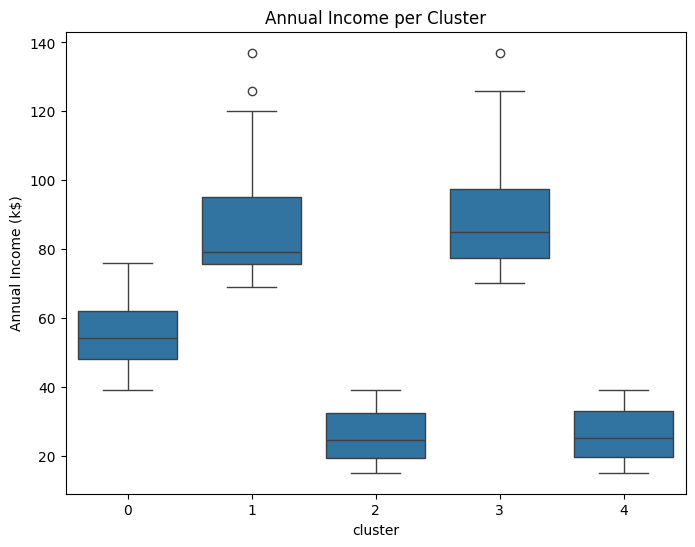

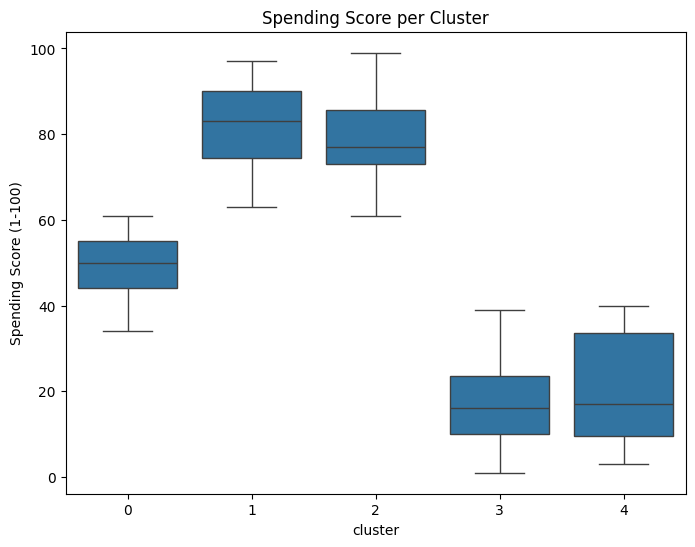

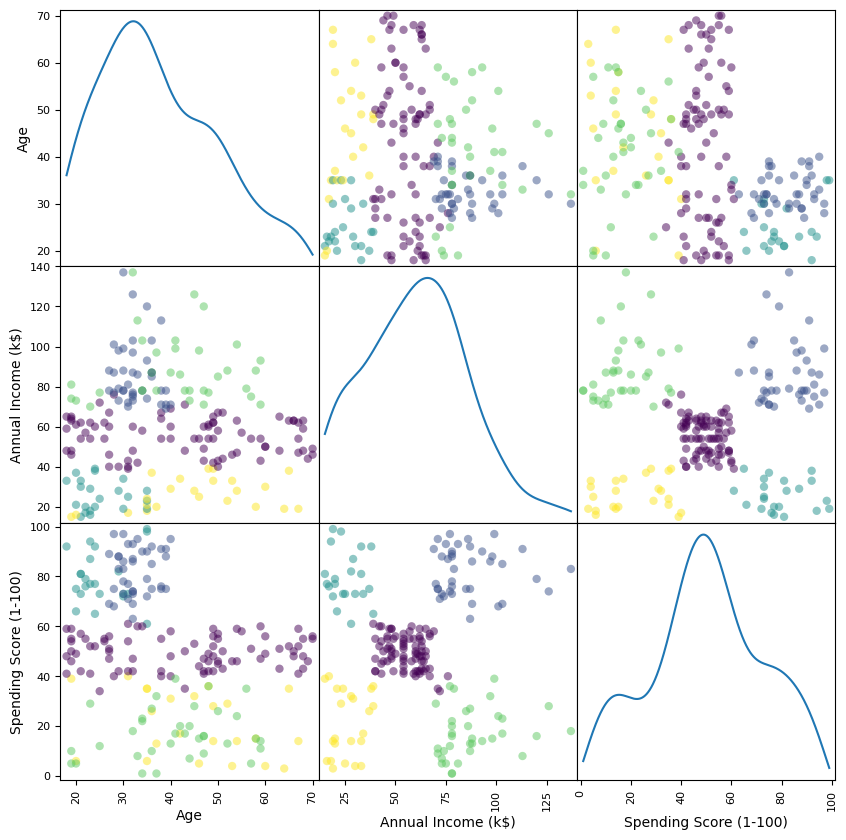

In [ ]:
import seaborn as sns
from pandas.plotting import scatter_matrix

print(kmeans_labels.shape)
print(df.shape)
df['cluster'] = kmeans_labels

groups = df.groupby('cluster')
for name, group in groups:
    print(f"Cluster {name}:")
    print(group[['Annual Income (k$)', 'Spending Score (1-100)']].describe())
    print()

# Boxplot for Annual Income
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='Annual Income (k$)', data=df)
plt.title("Annual Income per Cluster")
plt.show()

# Boxplot for Spending Score
plt.figure(figsize=(8,6))
sns.boxplot(x='cluster', y='Spending Score (1-100)', data=df)
plt.title("Spending Score per Cluster")
plt.show()

scatter_matrix(df[df.columns[:-1]], figsize=(10,10), diagonal='kde', c=df['cluster'], marker='o')
plt.show()
